# 4. Recortar imágenes
### Por: David Alonso Rueda Rodríguez
#### Esta actividad requiere la ejecución de las siguentes librerías:
- earthpy
- rasterio
- geopandas

In [2]:
import geopandas as gpd
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as ras

### Procesamiento de archivos Sentinel

In [16]:
# Lectura de archivo vectorial para el recorte
aoi = gpd.read_file('src/aoi_U18NW84.json')
# Inicialización de archivo
img = 'src/Sentinel/earthpy/Sentinel_Out.jp2'

##### Nota de interés:
Se requiere que el archivo vectorial tenga el mismo sistema de referencia de la imagen satelital para evitar un error del tipo:*ValueError: Input shapes do not overlap raster.*

In [86]:
# Recorte de imagen por archivo de referencia
with ras.open(img) as raster:
    src_image = raster.read()
    out_image, out_meta = es.crop_image(raster, aoi)

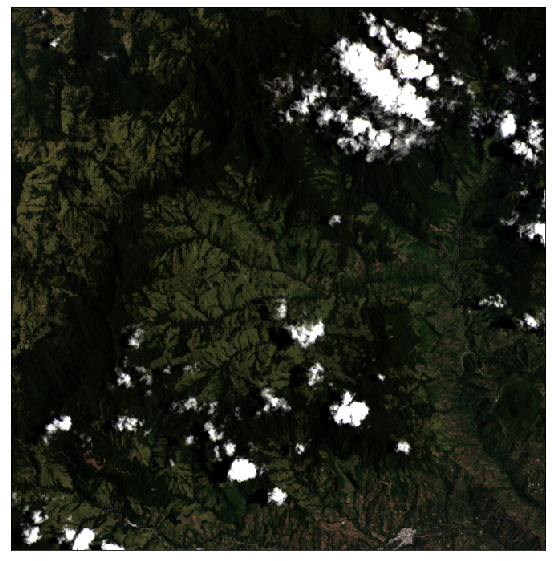

In [15]:
# Verificación del resultado del recorte
rgb = (2,1,0) # Determinación de composición para visualización 
ep.plot_rgb(out_image, rgb=rgb, stretch=True)

In [90]:
# Guardar archivo en directorio de interés
output_file = 'src/Sentinel/earthpy/Sentinel_AOI2.jp2'
with ras.open(output_file, 'w', **out_meta) as dst:
    dst.write(out_image)

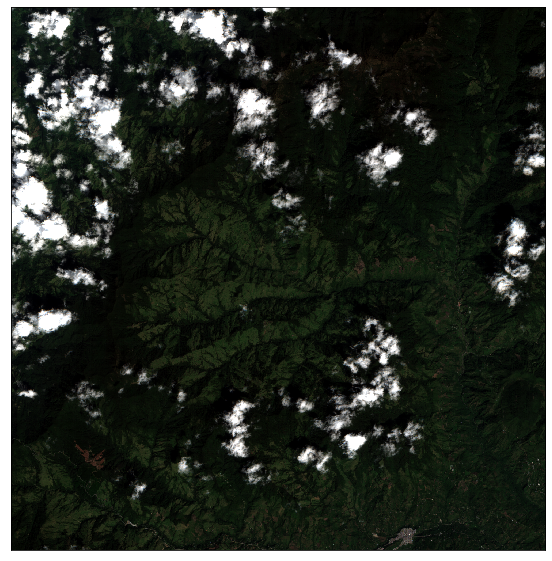

In [24]:
# Verificación del resultado del recorte
output_file = 'src/Sentinel/earthpy/Sentinel_AOI2.jp2'
rgb = (2,1,0) # Determinación de composición para visualización 
ep.plot_rgb(ras.open(output_file).read(), rgb=rgb, stretch=True)

In [14]:
output_file = 'src/Sentinel/earthpy/Sentinel_AOI2.jp2'
s = ras.open(output_file)
s.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1999,
 'height': 2033,
 'count': 4,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(10.0, 0.0, 437870.0,
        0.0, -10.0, 510770.0)}

### Procesamiento de archivos Landsat

In [18]:
# Lectura de archivo vectorial para el recorte
aoi = gpd.read_file('src/aoi_U18NW84.json')
# Inicialización de archivo
img = 'src/Landsat/earthpy/Landsat_Out.tif'

In [4]:
# Recorte de imagen por archivo de referencia
with ras.open(img) as raster:
    src_image = raster.read()
    out_image, out_meta = es.crop_image(raster, aoi)

In [5]:
# Guardar archivo en directorio de interés
output_file = 'src/Landsat/earthpy/Landsat_AOI.tif'
with ras.open(output_file, 'w', **out_meta) as dst:
    dst.write(out_image)

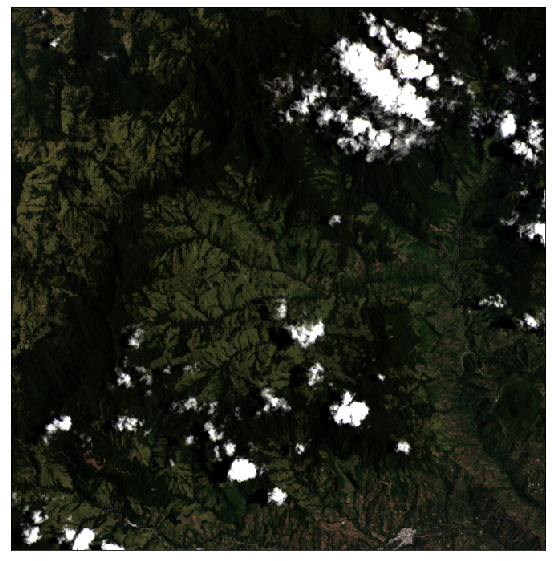

In [25]:
# Verificación del resultado del recorte
output_file = 'src/Landsat/earthpy/Landsat_AOI.tif'
rgb = (2,1,0) # Determinación de composición para visualización 
ep.plot_rgb(ras.open(output_file).read(), rgb=rgb, stretch=True)

In [11]:
a = ras.open(output_file)
a.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 667,
 'height': 678,
 'count': 4,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(30.0, 0.0, 437865.0,
        0.0, -30.0, 510765.0)}